<center>
<img src="./images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.Copyright (c) 2019 [Georgina Flesia](georgina.flesia@unc.edu.ar)


In [1]:
from random import uniform
import math
import matplotlib.pyplot as plt
from time import time
import numpy as np
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix as pl_cm
from sklearn.metrics import plot_roc_curve

# IntML2020 - Clasificación sobre Winsconsin breast cancer dataset - Logistic regression


# Ejercicio 1: 

Sea $y$ la etiqueta de clase, $y=1$ cuando $\mathbf{x}$ pertenece a la clase 1 e $y=0$ cuando no pertenece a la clase 1. La función densidad de logistic regression se supone tiene la forma 
$$
p(y=1 | \tilde{\mathbf{x}})=\frac{1}{1+\exp \left(-\tilde{\mathbf{w}}^{T} \tilde{\mathbf{x}}\right)}
$$

* a)  Plotee esta curva unidimensional con  $\mathbf{w}$ tomando los valores 10, 1 y 0.1 en la misma gráfica, para compararlas, en el rango [-5,5]. 


* b) Para estudiar la incidencia del parámetro de regularizacion $\ell_2$, que en sklearn se llama C y acompaña al término logistico, se pueden hacer curvas de coeficientes en funcion del C.
Cabe destacar que hay muchas formas equivalentes de generar discriminantes mediante regularización  a partir de la definición de la densidad como regresión logistica, la que usa sklearn es

 $\min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) $

 Observe que si no declara un valor para el parámetro, el clasificador logistic regression se inicializa con los siguientes parámetros 

```__init__(self, penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)```

El siguiente código realiza curvas de coeficientes en funcion de log(C), e imprime en patalla los scores correspondientes a acada modelo encontrado.  Realice una curva similar con los scores obtenidos para cada log(C), y plotee ambas curvas en paneles contiguos, para mejor observación. 

A continuación se utiliza la función  LogisticRegressionCV que implementa cross validation para seleccionar el mejor C en forma automática. Compare los resultados obtenidos en la curva de C, y compare el score del mejor. Que concluye? 

La función LogisticRegressionCV tambien guarda los valores de las curvas de C implementadas, y los coeficientes de los modelos. Realice un plot parecido al anterior para mostrar que rango de la curva 'a mano' fue estudiado por LogisticRegressionCV, y si logró encontrar el modelo estable. A fin de cuentas, el modelo de regresion logistica no deberia depender de la regularizacion usada para su cómputo. 

The shape of the dataset is (100, 4)
Curvas de regularizacion en funcion de log(C) ...
This took 0.020s
[[  1.23655434   0.36619954   2.92127679   1.68809978]
 [  0.18467169  -1.2601447   15.7643492   11.72844854]
 [-11.12052963 -12.79050702  38.76738035  40.91553966]
 [-18.73727212 -35.1725877   60.62184925  99.36817374]
 [-19.47075171 -50.99333998  73.08207052 139.8563273 ]
 [-19.47525479 -52.69026849  74.42191529 144.23137584]
 [-19.47523622 -52.77470041  74.4886381  144.44925995]
 [-19.47523477 -52.7786327   74.49174564 144.45940803]
 [-19.47523471 -52.77881525  74.4918899  144.45987913]
 [-19.4752347  -52.77882372  74.4918966  144.459901  ]
 [-19.4752347  -52.77882411  74.49189691 144.45990202]
 [-19.4752347  -52.77882413  74.49189693 144.45990206]
 [-19.4752347  -52.77882413  74.49189693 144.45990207]
 [-19.4752347  -52.77882413  74.49189693 144.45990207]
 [-19.4752347  -52.77882413  74.49189693 144.45990207]
 [-19.4752347  -52.77882413  74.49189693 144.45990207]]
[[0.91]
 [0.96]

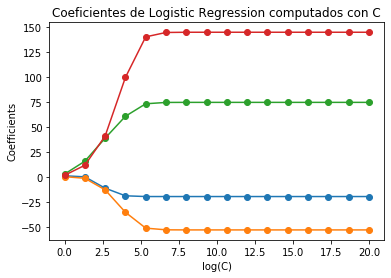

[[-15.23614404 -19.62184474  45.20455064  56.75623795]]
[3.11111111]
0.97


In [2]:
###################################################################
#DATASET

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0] #saco la clase 3, quedan dos clases, cuatro variables.
y = y[y != 0]

X /= X.max()  # Normalice X para acelerar la convergencia
print('The shape of the dataset is', X.shape)

##############################################################
print("Curvas de regularizacion en funcion de log(C) ...")

cs = np.logspace(0, 20, 16)
start = time()
clf = linear_model.LogisticRegression(penalty='l2', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True,
                                      intercept_scaling=10000.)
coefs_ = []
scores_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
    scores_.append(clf.score(X,y).ravel().copy())
print("This took %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
scores_= np.array(scores_)
print(coefs_)
print(scores_)
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Coeficientes de Logistic Regression computados con C')
plt.axis('tight')
plt.show()

#########################################################
#cross validation for parameter estimation of logistic regression


from sklearn.linear_model import LogisticRegressionCV

#LogisticRegressionCV implements Logistic Regression with built-in cross-validation support,
#to find the optimal C and l1_ratio parameters according to the scoring attribute.
#The “newton-cg”, “sag”, “saga” and “lbfgs” solvers are found to be faster for high-dimensional dense data,
#due to warm-starting (see Glossary).

clf = LogisticRegressionCV(cv=5,penalty='l2', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      intercept_scaling=10000.)
clf.fit(X, y)
coefs_ = []
coefs_.append(clf.coef_.ravel().copy())
coefs_ = np.array(coefs_)
print(coefs_)
CC = clf.C_
print(np.log10(CC))
print(clf.score(X,y))

* b) Estudie la incidencia del parámetro de regularizacion $\ell_1$, que en sklearn se llama C y acompaña al término logistico. Cabe destacar que hay muchas formas equivalentes de generar discriminantes mediante regularización  a partir de la definición de la densidad como regresión logistica.

 $\min_{w, c} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$

* c) Estudie la incidencia del parámetro de regularizacion Elastic_net, $\rho$ que es una combinación de regularización $\ell_1$ y $\ell_2$, y del parámetro C que acompaña al término logistico. Cabe destacar que hay muchas formas equivalentes de generar discriminantes mediante regularización  a partir de la definición de la densidad como regresión logistica.

 $\min_{w, c} \frac{1 - \rho}{2}w^T w + \rho \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$

## Respuesta

<span style="color:green"> RESPUESTA (a) </span>

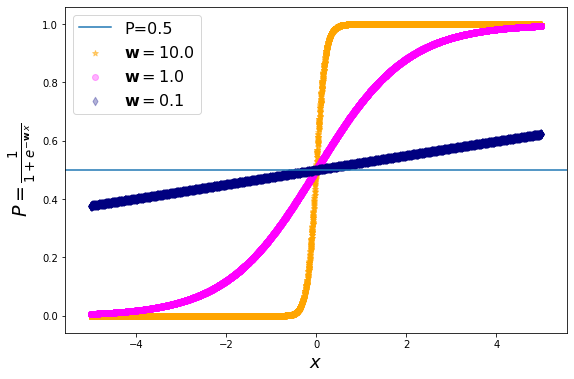

In [3]:
random1=[]
random2=[]
random3=[]
xlist = []

w=[10, 1,0.1]

for i in range(10000):
    x = uniform(-5,5)
    xlist.append(x)
    logreg1 = 1/(1+math.exp(-(w[0]*x)))
    logreg2 = 1/(1+math.exp(-(w[1]*x)))
    logreg3 = 1/(1+math.exp(-(w[2]*x)))
    random1.append(logreg1)
    random2.append(logreg2)
    random3.append(logreg3)

fig = plt.figure(figsize=(9, 6))
plt.scatter(xlist, random1, marker='*', c='orange',alpha=0.5,label=r'$\mathbf{w} = %3.1f$'%(w[0]))
plt.scatter(xlist, random2, c='magenta',alpha=0.3,label=r'$\mathbf{w} = %3.1f$'%(w[1]))
plt.scatter(xlist, random3, c='navy',marker='d', alpha=0.3,label=r'$\mathbf{w} = %3.1f$'%(w[2]))
plt.axhline(y=0.5, label='P=0.5')
plt.ylabel(r'$P=\frac{1}{1+e^{-\mathbf{w} \, x}}$', fontsize=19)
plt.xlabel(r'$x$',fontsize=18)
plt.legend(fontsize=16);

<span style="color:green"> RESPUESTA (b) </span>

In [4]:
def generate_regularization_curves(penalty, solver):
    print("Regularization curves as a function of log (C) - Parameter: " + penalty)

    cs = np.logspace(0, 20, 16)
    start = time()
    clf = linear_model.LogisticRegression(penalty=penalty, solver=solver,
                                          tol=1e-6, max_iter=int(1e6),
                                          warm_start=True,
                                          intercept_scaling=10000.)
    coefs_ = []
    scores_ = []
    for c in cs:
        if penalty ==  'elasticnet':
            clf.set_params(C=c, l1_ratio=0.7)
        else:
            clf.set_params(C=c)
        clf.fit(X, y)
        coefs_.append(clf.coef_.ravel().copy())
        scores_.append(clf.score(X,y).ravel().copy())
    print("This took %0.3fs" % (time() - start))
    print('-------------------------------------------------------------------')
    coefs_ = np.array(coefs_)
    scores_= np.array(scores_)
    print('*** RESULTS ***\n')
    for coef, score in zip(coefs_, scores_):
        print('* With this coeficients: ', coef)
        print('---> the score was', score)
        print()
    plt.plot(np.log10(cs), coefs_, marker='o')
    ymin, ymax = plt.ylim()
    plt.xlabel('log(C)')
    plt.ylabel('Coefficients')
    plt.title('Coeficientes de Logistic Regression computed with C')
    plt.axis('tight')

In [5]:
def cross_validation_parameter(penalty, solver): 
    cs = np.logspace(0, 20, 16)
    clf = LogisticRegressionCV(Cs=cs, cv=5,penalty=penalty, solver=solver,
                               tol=1e-6, max_iter=int(1e9),
                               intercept_scaling=10000.)
    if penalty ==  'elasticnet':
        clf.set_params(l1_ratios=[0.7])
    clf.fit(X, y)
    coefs_ = []
    coefs_.append(clf.coef_.ravel().copy())
    coefs_ = np.array(coefs_)
    print('The coeficients are:', coefs_[0])
    CC = clf.C_
    print('The best C parameter:', np.log10(CC)[0])
    print('The best score:', clf.score(X,y))
    return clf

Regularization curves as a function of log (C) - Parameter: l1
This took 0.768s
-------------------------------------------------------------------
*** RESULTS ***

* With this coeficients:  [ 0.          0.         17.56584074  0.        ]
---> the score was [0.93]

* With this coeficients:  [-10.69318155 -13.03852687  40.69326994  54.68157967]
---> the score was [0.97]

* With this coeficients:  [-18.68605822 -45.40550667  67.80849328 126.55979059]
---> the score was [0.98]

* With this coeficients:  [-19.46823218 -51.80972341  73.72047836 142.00338424]
---> the score was [0.98]

* With this coeficients:  [-19.50578504 -52.15480349  74.04179103 142.8425816 ]
---> the score was [0.98]

* With this coeficients:  [-19.52289249 -52.22645585  74.13785485 143.00179074]
---> the score was [0.98]

* With this coeficients:  [-19.52851573 -52.18852658  74.12347255 143.02320379]
---> the score was [0.98]

* With this coeficients:  [-19.48352622 -52.15157966  74.07196403 143.05921362]
---> the s

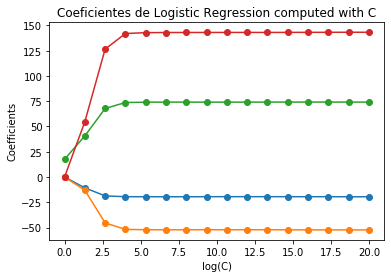

In [6]:
generate_regularization_curves('l1', 'saga')

In [7]:
print('---> With LogisticRegressionCV')
clf = cross_validation_parameter('l1', 'saga')

---> With LogisticRegressionCV
The coeficients are: [-18.6335783  -46.20549742  68.3203242  128.62779631]
The best C parameter: 2.6666666666666665
The best score: 0.98


Se observa que tanto en la regularizacion del parametro $\ell_1$ hecha manualmente como la hecha con *LogisticRegressionCV*
los coeficiente se parecen bastante, y el best score es el mismo que el alcanzado en ambos casos.

<span style="color:green"> RESPUESTA (c) AQUÍ </span>

Regularization curves as a function of log (C) - Parameter: elasticnet
This took 0.738s
-------------------------------------------------------------------
*** RESULTS ***

* With this coeficients:  [0.71115185 0.         5.54799956 2.42798791]
---> the score was [0.93]

* With this coeficients:  [-2.7677676  -3.26179716 23.31995242 19.1403748 ]
---> the score was [0.96]

* With this coeficients:  [-15.02729488 -19.76467119  47.23755941  59.73743878]
---> the score was [0.97]

* With this coeficients:  [-19.32447812 -43.7344469   67.37537141 121.24816983]
---> the score was [0.98]

* With this coeficients:  [-19.50517587 -51.62405578  73.62456136 141.47393122]
---> the score was [0.98]

* With this coeficients:  [-19.50765046 -52.14486463  74.03660206 142.81460032]
---> the score was [0.98]

* With this coeficients:  [-19.54738348 -52.13625674  74.10465671 142.80958535]
---> the score was [0.98]

* With this coeficients:  [-19.52260895 -52.19157786  74.11533209 142.94033991]
---> the s

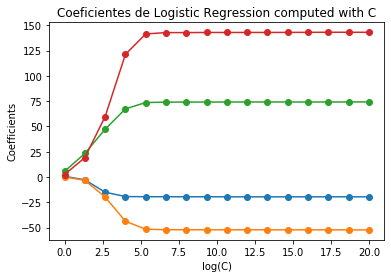

In [8]:
generate_regularization_curves('elasticnet', 'saga')

In [9]:
print('---> With LogisticRegressionCV')
clf = cross_validation_parameter('elasticnet', 'saga')

---> With LogisticRegressionCV
The coeficients are: [-15.02661732 -19.76496157  47.23597278  59.73777036]
The best C parameter: 2.6666666666666665
The best score: 0.97


Se observa que tanto en la regularizacion del parametro Elastic_net, $\rho$ hecha manualmente como la hecha con *LogisticRegressionCV*
los coeficiente difieren bastante, sino hay un error puede significar que no se encontró un modelo estable. El parametro Elastic_net requiere setear el parámetro *l1_ratio* (en este caso fue seteado a 0.7, debe ser un float entre 0 y 1)

## Ejercicio 2: 
Sobre el grupo de datos sobre cancer de mama 'data_breast_cancer.csv', aplique knn, lda, Gaussian Naive Bayes, perceptron y logistic regression, separando en 80% train y 20% test cinco veces. Arme las matrices de confusion y curvas ROC y discuta los resultados haciendo énfasis en cuales son los métodos Gaussianos, cuales los no paramétricos y cuales los determinísticos. 
Como combinaria los resultados de los 5 folds en un solo conjunto de métricas y curvas?

Attribute Information:

ID number 2) Diagnosis (M = malignant, B = benign) 3–32)
Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter² / area — 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension (“coastline approximation” — 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [10]:
#importing the dataset 
df = pd.read_csv('data_breast_cancer.csv')
dataset = df.drop(['Unnamed: 32'], axis=1)
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 32)


In [12]:
dataset.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [13]:
dataframe = pd.DataFrame(Y)

#Encoding categorical data values 
labelencoder_Y = LabelEncoder()
Y1 = labelencoder_Y.fit_transform(Y)

In [14]:
#Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y1, test_size = 0.25, random_state = 0)

In [16]:
#Fitting Naive_Bayes
from sklearn.naive_bayes import GaussianNB
#Fitting Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
#Fitting Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
#Fitting the Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
#Fitting LDA Algorithm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Fitting Perceptron
from sklearn.linear_model import Perceptron

In [17]:
classifiers = [
    LogisticRegression(random_state = 0, solver='lbfgs'),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    GaussianNB(),
    LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
    Perceptron(tol=1e-3),
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)]
    #SVC(kernel="linear", C=1),
    #SVC(kernel = 'rbf', random_state = 0),

In [18]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

LogisticRegression(random_state=0)
Normalized confusion matrix
[[0.98 0.02]
 [0.06 0.94]]


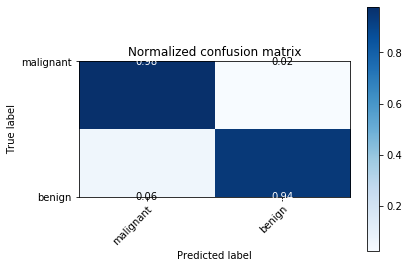

KNeighborsClassifier()
Normalized confusion matrix
[[0.99 0.01]
 [0.11 0.89]]


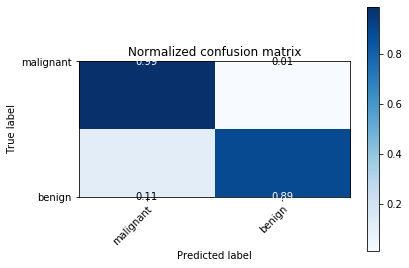

GaussianNB()
Normalized confusion matrix
[[0.93 0.07]
 [0.11 0.89]]


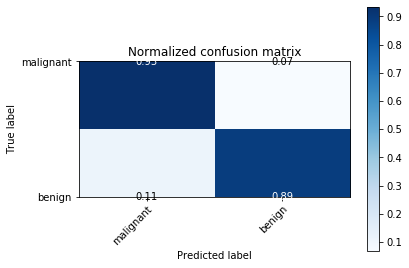

LinearDiscriminantAnalysis(store_covariance=True)
Normalized confusion matrix
[[1.   0.  ]
 [0.08 0.92]]


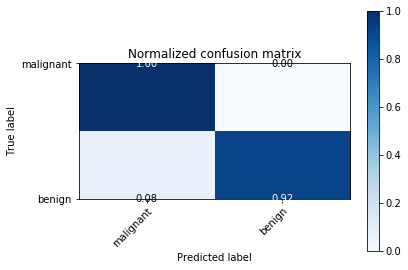

Perceptron()
Normalized confusion matrix
[[0.97 0.03]
 [0.06 0.94]]


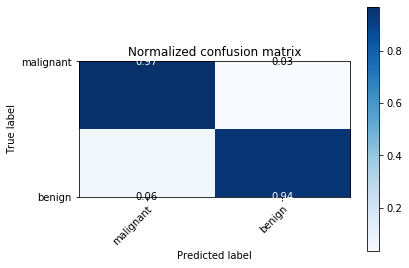

DecisionTreeClassifier(criterion='entropy', random_state=0)
Normalized confusion matrix
[[0.96 0.04]
 [0.04 0.96]]


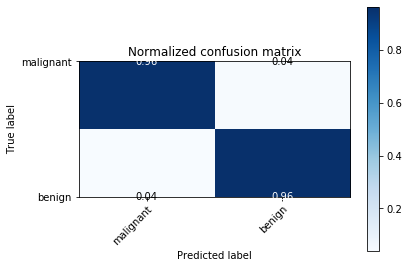

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
Normalized confusion matrix
[[0.99 0.01]
 [0.02 0.98]]


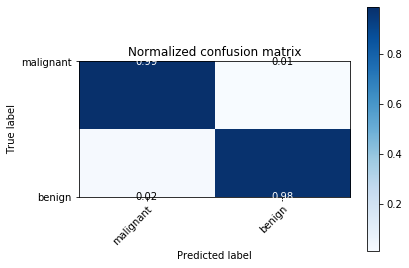

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
Y_labels = np.array(['malignant', 'benign'])

#classes = Y_labels[unique_labels(Y_test, Y_pred)]

    # iterate over classifiers
lst=[]
for clf in classifiers:
    clf.fit(X_train, Y_train)
    lst.append(clf.score(X_test, Y_test))
    Y_pred = clf.predict(X_test)
    np.set_printoptions(precision=2)
    print(clf)
    # Plot normalized confusion matrix
    plot_confusion_matrix(Y_test, Y_pred, classes=Y_labels, normalize=True,title='Normalized confusion matrix')
    # Plot non-normalized confusion matrix
    #plot_confusion_matrix(Y_test, Y_pred, classes=Y,title='Confusion matrix, without normalization')
    plt.show()

# Plot normalized confusion matrix
#plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title='Normalized confusion matrix')


In [20]:
print(lst)

[0.965034965034965, 0.951048951048951, 0.916083916083916, 0.972027972027972, 0.958041958041958, 0.958041958041958, 0.986013986013986]


## Reorganice el código anterior y responda las preguntas aquí

<span style="color:green"> RESPUESTA </span>

Siguiendo lo realiado en el practico anterior comenzamos cargando los clasificador a usar.

Estos clasificadores pueden ser agrupados en:
* Determinísticos: Decision Tree (el único)
* No paramétricos: KNN, Random Forest
* Paramétricos: Logistic Regression, LDA, Perceptron
* Gaussianos = Naive Bayes (tambien paramétrico) 

In [21]:
my_classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=0, solver='lbfgs')),
    ('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)),
    ('Naive Bayes', GaussianNB()),
    ('LDA', LinearDiscriminantAnalysis(solver="svd", store_covariance=True)),
    ('Perceptron', Perceptron(tol=1e-3)),
    ('DT', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)),
    ('RF', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))
]

Para cada uno de los clasificador realizamos cinco particiones del dataset en train y test en la proporción (80/20). Luego computamos el error para cada partición y tomamos el promedio de los errores.

In [22]:
mean_errors = []

print('*** Mean Errors for classifiers ***')
print('----------------------------------------------\n')
# iterate over my_classifiers
for name, clf in my_classifiers:
    print("* Training: %s" % name)
    rng = np.random.RandomState(42)
    splits_errors = []
    # for each classifier separate 5 times
    # in train and test set (80/20)
    for r in range(5):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, Y1, test_size=0.2, random_state=rng)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        # get the error of this split
        splits_errors.append(1 - np.mean(y_pred == y_test))
    # quite the mean error of the five splits.
    mean_errors.append(np.mean(splits_errors))
    print('---> The mean error for this classifier was: %2.5f' % np.mean(splits_errors))
    print()

*** Mean Errors for classifiers ***
----------------------------------------------

* Training: Logistic Regression
---> The mean error for this classifier was: 0.01579

* Training: KNN
---> The mean error for this classifier was: 0.03333

* Training: Naive Bayes
---> The mean error for this classifier was: 0.05614

* Training: LDA
---> The mean error for this classifier was: 0.02982

* Training: Perceptron
---> The mean error for this classifier was: 0.03860

* Training: DT
---> The mean error for this classifier was: 0.06316

* Training: RF
---> The mean error for this classifier was: 0.03333



Se observa que no hay muchas diferencias en los errores promedios entre los diferentes clasificadores. Lluego generamos las matrices de confusion para cada clasificador en una nueva partición.

In [23]:
# Splitting the dataset into the training set and test set 
# to return ROC and confusion matrices
X_train, X_test, y_train, y_test = train_test_split(X, Y1, 
                                                    test_size=0.2,
                                                    random_state=0)

('Logistic Regression', LogisticRegression(random_state=0))
('KNN', KNeighborsClassifier())
('Naive Bayes', GaussianNB())
('LDA', LinearDiscriminantAnalysis(store_covariance=True))
('Perceptron', Perceptron())
('DT', DecisionTreeClassifier(criterion='entropy', random_state=0))
('RF', RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0))


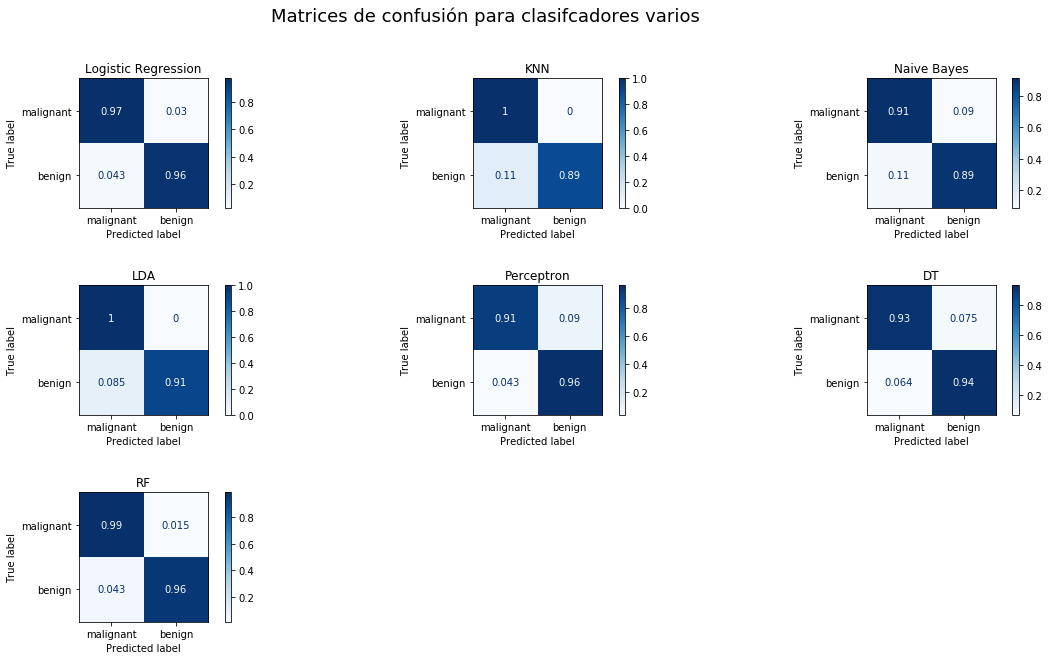

In [24]:
# Create a figure for the confusion matrices
fig_cm = plt.figure(figsize=(20, 10))


# iterate over the classifier
for idx, clf in enumerate(my_classifiers):
    ax = fig_cm.add_subplot(3, 3, idx+1)
    ax.set_title(str(clf[0]))
    clf[1].fit(X_train, y_train)
    print(clf)
    pl_cm(clf[1], X_test, y_test, 
          display_labels=Y_labels,
          cmap=plt.cm.Blues,
          ax=ax, normalize='true')
    
fig_cm.subplots_adjust(wspace=0.2, hspace=0.6)
fig_cm.suptitle('Matrices de confusión para clasifcadores varios', size=18);

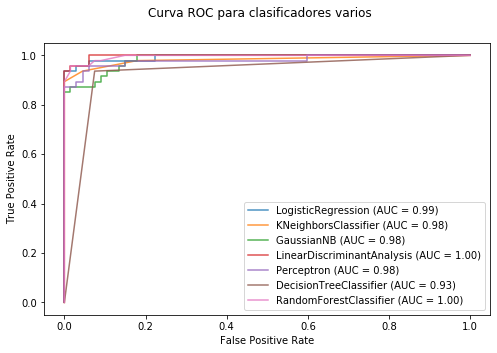

In [25]:
# Create a figure for the confusion matrices
fig_roc, ax = plt.subplots(1, 1, figsize=(8, 5))
fig_roc.suptitle('Curva ROC para clasificadores varios');
for clf in my_classifiers:
    clf[1].fit(X_train, y_train)
    ax = plt.gca()
    plot_roc_curve(clf[1], X_test, y_test, ax=ax, alpha=0.8)

La curva ROC no muestra que Decisicion Tree es el 'peor' clasificador aunque como su valor esta entre $[0.9, 0.97)$ se lo puede considerar un clasificador muy bueno. El resto de los clasifacores se consideran excelentes. 

Para combinar los resultados de los cinco folds se podria construir una curva ROC tomando todas las curvas que se generan en cada fold. Luego, es posible calcular el área media debajo de la curva y ver la varianza de la curva cuando el conjunto de entrenamiento se divide en diferentes subconjuntos. Esto muestra aproximadamente cómo la salida del clasificador se ve afectada por los cambios en los datos de entrenamiento, y cuán diferentes son las divisiones generadas por los conjuntos de test diferentes.

## Ejercicio 3: 
Realice el mismo estudio con el archivo gender purchase. 

In [26]:
import pandas as pd
gender_df = pd.read_csv('gender_purchase.csv')
gender_df.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [27]:
table = pd.crosstab(gender_df['Gender'], gender_df['Purchase'])
print(table)

Purchase   No  Yes
Gender            
Female    106  159
Male      125  121



## Respuesta

<span style="color:green"> RESPUESTA </span>

In [28]:
Y_gender = gender_df['Purchase']
X_gender = gender_df['Gender']
X_gender_enc = pd.get_dummies(X_gender)

In [29]:
labelencoder_Y = LabelEncoder()
Y1_gender_enc = labelencoder_Y.fit_transform(Y_gender)

In [30]:
# iterate over my_classifiers
for name, clf in my_classifiers:
    print("* Training: %s" % name)
    rng = np.random.RandomState(42)
    splits_errors = []
    # for each classifier separate 5 times
    # in train and test set (80/20)
    for r in range(5):
        X_train, X_test, y_train, y_test = \
            train_test_split(X_gender_enc, Y1_gender_enc, 
                             test_size=0.20, random_state=rng)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        # get the error of this split
        splits_errors.append(1 - np.mean(y_pred == y_test))
    # quite the mean error of the five splits.
    mean_errors.append(np.mean(splits_errors))
    print('---> The mean error for this classifier was: %2.5f' % np.mean(splits_errors))
    print()

* Training: Logistic Regression
---> The mean error for this classifier was: 0.46602

* Training: KNN
---> The mean error for this classifier was: 0.49709

* Training: Naive Bayes
---> The mean error for this classifier was: 0.45243

* Training: LDA
---> The mean error for this classifier was: 0.46602

* Training: Perceptron
---> The mean error for this classifier was: 0.53204

* Training: DT
---> The mean error for this classifier was: 0.46602

* Training: RF
---> The mean error for this classifier was: 0.45243



Para este dataset se observan malos resultados en todos los clasficadores, en los errores promedios, sobrepasando el 50 % de error para algunos clasificador, lo cual no es mejor que tirar la moneda. El mejor clasificador en base al error resulta ser Random Forest y Naive Bayes.

In [32]:
# Splitting the dataset into the training set and test set 
# to return ROC
X_train, X_test, y_train, y_test = train_test_split(X_gender_enc, Y1_gender_enc, 
                                                    test_size=0.2,
                                                    random_state=0)

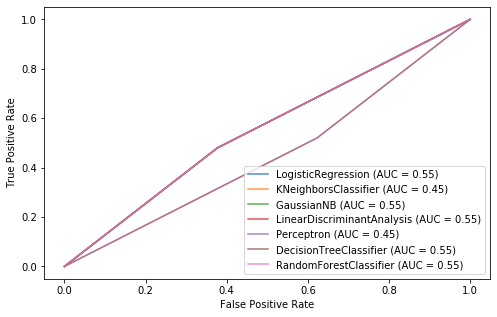

In [33]:
# Create a figure for the confusion matrices
fig_roc, ax = plt.subplots(1, 1, figsize=(8, 5))

for clf in my_classifiers:
    clf[1].fit(X_train, y_train)
    ax = plt.gca()
    plot_roc_curve(clf[1], X_test, y_test, ax=ax, alpha=0.8)

La curva ROC muestra que todos son malos clasificadores para este dataset.